###**Importing the necessary packages and libraries**

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

###**Generating Synthetic Dataset for CPU Overheating Problem**

Let's have 7500 samples of 6 features.

The exact relationships between these factors can be complex and may depend on the specific hardware, system configuration, workload, and other variables.
However, a simplified example of how these factors might interact:

Let's assume a simple rule of thumb for illustration purposes:

**CPU Overheating Threshold:**

1. Temperature > 89°C

OR

**The CPU is considered overheating if any of the following conditions are true:**
1. Temperature > 80°C
2. Either fan speed is greater than 3000 RPM or CPU load is greater than 0.8
3. Either CPU load is greater than 0.7, GPU load is greater than 0.7, RAM usage is greater than 0.7, or VRAM usage is greater than 0.7



In [18]:
import numpy as np

# Generate synthetic dataset
np.random.seed(0)
num_samples = 7500

temperature = np.random.uniform(30, 100, num_samples)
fan_speed = np.random.randint(1000, 5000, num_samples)
cpu_load = np.random.uniform(0.1, 1.0, num_samples)
gpu_load = np.random.uniform(0.1, 1.0, num_samples)
ram_usage = np.random.uniform(0.1, 1.0, num_samples)
vram_usage = np.random.uniform(0.1, 1.0, num_samples)

# Hypothetical condition to check for CPU overheating
"""is_overheated = (temperature>89) or ((temperature > 80) and ((fan_speed > 3000) or (cpu_load > 0.8)) and \
                ((cpu_load > 0.7) or (gpu_load > 0.7) or (ram_usage > 0.7) or (vram_usage > 0.7)))"""
is_overheated = np.logical_or((temperature>89),np.logical_and(np.logical_and((temperature > 80),np.logical_or((fan_speed > 3000),(cpu_load > 0.8))),np.logical_or(np.logical_or((cpu_load > 0.7),(gpu_load > 0.7)),np.logical_or((ram_usage > 0.7),(vram_usage > 0.7)))))
print(is_overheated[0:15])

# Explanation:
# The CPU is considered overheating if any of the following conditions are true:
# 1. Temperature is greater than 89°C
# OR
# 1. Temperature is greater than 80°C
# 2. Either fan speed is greater than 3000 RPM or CPU load is greater than 0.8
# 3. Either CPU load is greater than 0.7, GPU load is greater than 0.7, RAM usage is greater than 0.7,
#    or VRAM usage is greater than 0.7

data = {
    'Temperature': temperature,
    'FanSpeed': fan_speed,
    'CPULoad': cpu_load,
    'GPULoad': gpu_load,
    'RAMUsage': ram_usage,
    'VRAMUsage': vram_usage,
    'IsOverheated': is_overheated
}

# Create DataFrame
df = pd.DataFrame(data)

# Save the dataset to a CSV file
df.to_csv('cpu_overheat_dataset_extended.csv', index=False)

[False  True False False False False False  True  True False  True False
 False  True False]


In [20]:
import io
df = pd.read_csv('cpu_overheat_dataset_extended.csv')
df.head()

,Temperature,FanSpeed,CPULoad,GPULoad,RAMUsage,VRAMUsage,IsOverheated
0,68.416945,3640,0.945175,0.596625,0.832595,0.338373,False
1,80.063256,3283,0.264145,0.323704,0.367499,0.734981,True
2,72.193436,3041,0.558116,0.137911,0.277171,0.472695,False
3,68.141823,1280,0.513918,0.263455,0.384985,0.402232,False
4,59.655836,1762,0.227540,0.801922,0.742864,0.356911,False


###**Dataset Analysis**
1. Computes summary statistics like mean, standard deviation, min, max, etc., for each numerical feature.
2. Generates a correlation matrix to understand the relationships between features.
3. Creates a histogram of the Temperature feature to visualize its distribution.
4. Generates a boxplot to compare FanSpeed with overheating.
5. Creates a pairplot to visualize pairwise relationships between selected features, color-coded by the 'IsOverheated' label.

In [21]:
import matplotlib.pyplot as pl_t
import seaborn as sns

# Load the dataset
df = pd.read_csv('cpu_overheat_dataset_extended.csv')

# Summary statistics
summary = df.describe()
print(summary)


       Temperature     FanSpeed      CPULoad      GPULoad     RAMUsage  \
count  7500.000000  7500.000000  7500.000000  7500.000000  7500.000000   
mean     64.749272  3015.047067     0.547145     0.552411     0.549617   
std      20.235685  1151.686624     0.259660     0.259218     0.258331   
min      30.005071  1000.000000     0.100004     0.100341     0.100168   
25%      47.294925  2029.000000     0.321297     0.326381     0.329590   
50%      64.526090  3027.000000     0.543227     0.556167     0.544046   
75%      82.317813  4006.000000     0.770671     0.777331     0.773879   
max      99.997481  4999.000000     0.999971     0.999910     0.999841   

         VRAMUsage  
count  7500.000000  
mean      0.549198  
std       0.260669  
min       0.100022  
25%       0.323292  
50%       0.552209  
75%       0.774444  
max       0.999999  


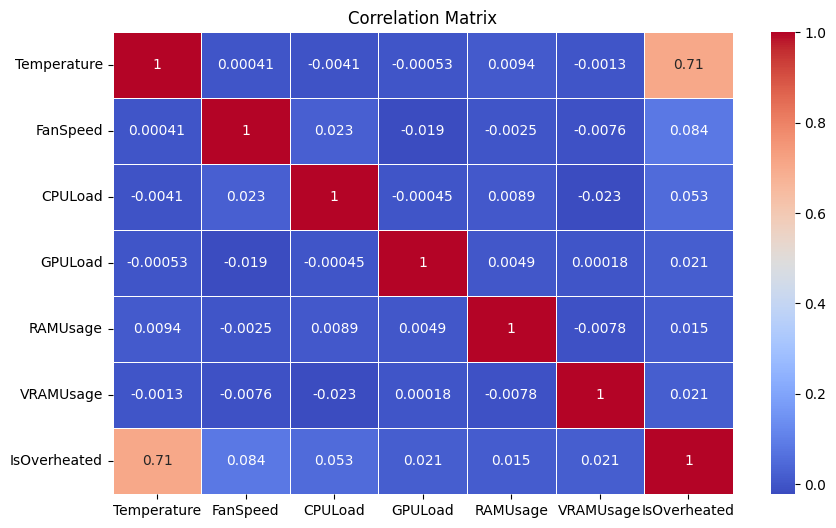

In [22]:
# Correlation matrix
correlation_matrix = df.corr()
pl_t.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
pl_t.title('Correlation Matrix')
pl_t.show()

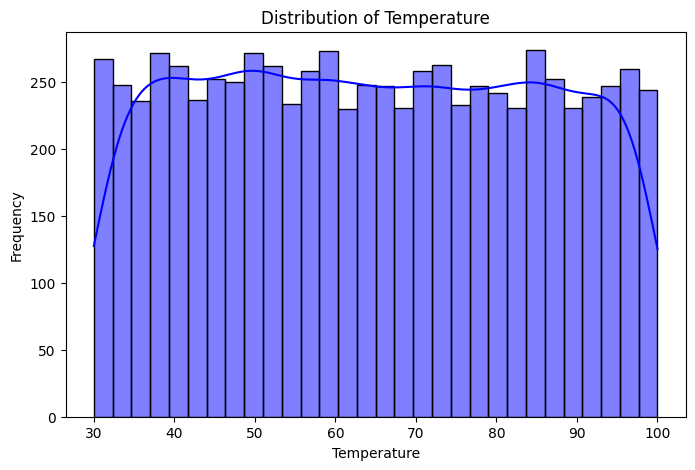

In [23]:
# Histogram of Temperature
pl_t.figure(figsize=(8, 5))
sns.histplot(df['Temperature'], bins=30, kde=True, color='blue')
pl_t.xlabel('Temperature')
pl_t.ylabel('Frequency')
pl_t.title('Distribution of Temperature')
pl_t.show()

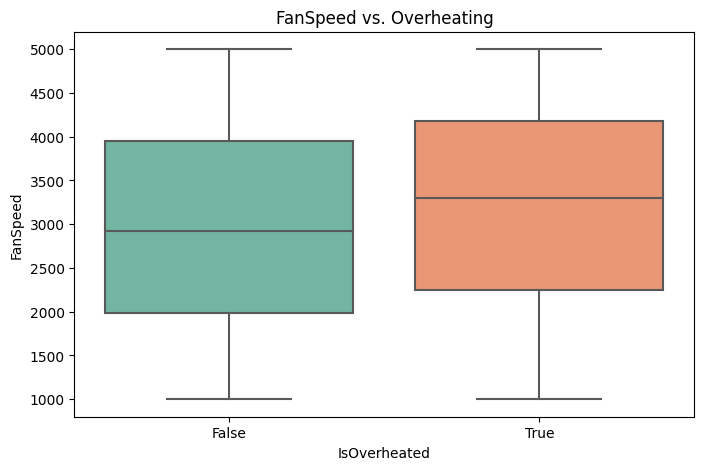

In [24]:
# Boxplot of FanSpeed
pl_t.figure(figsize=(8, 5))
sns.boxplot(x=df['IsOverheated'], y=df['FanSpeed'], palette='Set2')
pl_t.xlabel('IsOverheated')
pl_t.ylabel('FanSpeed')
pl_t.title('FanSpeed vs. Overheating')
pl_t.show()

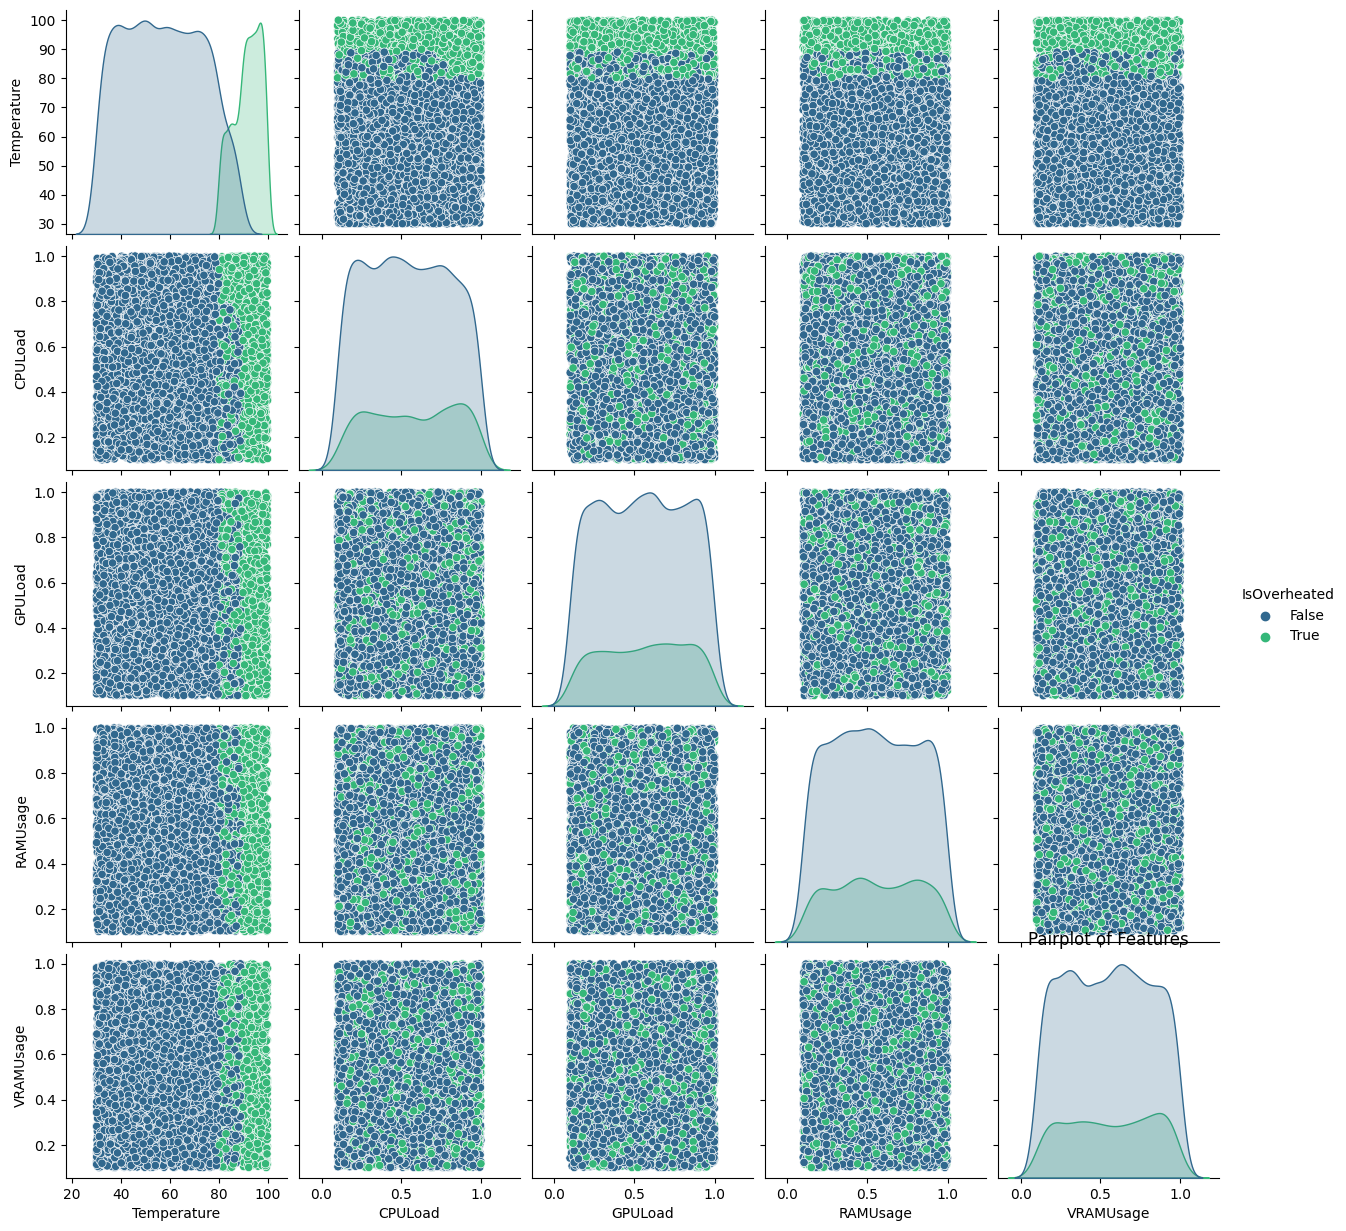

In [25]:
# Pairplot for selected features
sns.pairplot(df[['Temperature', 'CPULoad', 'GPULoad', 'RAMUsage', 'VRAMUsage', 'IsOverheated']], hue='IsOverheated', palette='viridis')
pl_t.title('Pairplot of Features')
pl_t.show()

###**Split dataset into features and target. Finally, into training and testing sets**

In [26]:
X = df[['Temperature', 'FanSpeed', 'CPULoad', 'GPULoad', 'RAMUsage', 'VRAMUsage']]
y = df['IsOverheated']
print(X)

      Temperature  FanSpeed   CPULoad   GPULoad  RAMUsage  VRAMUsage
0       68.416945      3640  0.945175  0.596625  0.832595   0.338373
1       80.063256      3283  0.264145  0.323704  0.367499   0.734981
2       72.193436      3041  0.558116  0.137911  0.277171   0.472695
3       68.141823      1280  0.513918  0.263455  0.384985   0.402232
4       59.655836      1762  0.227540  0.801922  0.742864   0.356911
...           ...       ...       ...       ...       ...        ...
7495    71.325173      4504  0.708270  0.142489  0.283292   0.891988
7496    68.097202      2459  0.209508  0.283476  0.908372   0.646874
7497    40.139946      4804  0.143440  0.471782  0.796739   0.120190
7498    38.311510      4664  0.436832  0.953923  0.698873   0.894984
7499    94.970794      2203  0.428473  0.865906  0.878454   0.337942

[7500 rows x 6 columns]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
X_train_scaled

array([[-0.05523084,  1.7267208 , -1.47698039, -1.69317253,  0.71583081,
         1.04853677],
       [ 1.5459843 , -0.78994395, -0.38481054,  0.58839114,  1.2176712 ,
        -0.41027062],
       [ 1.5008536 ,  0.25116599,  0.73578605,  0.09741314, -0.69058224,
        -1.20466699],
       ...,
       [ 1.6906209 ,  1.36929902,  1.24619701,  0.58541366, -0.97945595,
         0.56645498],
       [ 1.5301839 ,  0.69166886,  0.09876206,  0.5972956 ,  0.29731793,
        -1.63760958],
       [ 1.43765224, -0.53204639, -0.92428401, -0.8755511 ,  0.37332681,
         1.11887391]])

###**Train machine learning models**
We'll be using these four machine learning models:


1.   Logistic Regression
2.   Decision Tree
3.   Random Forests
4.   Naive Bayes
5.   Support Vector Machine



In [29]:
from sklearn.svm import SVC
# Train machine learning models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC()
}

results = []

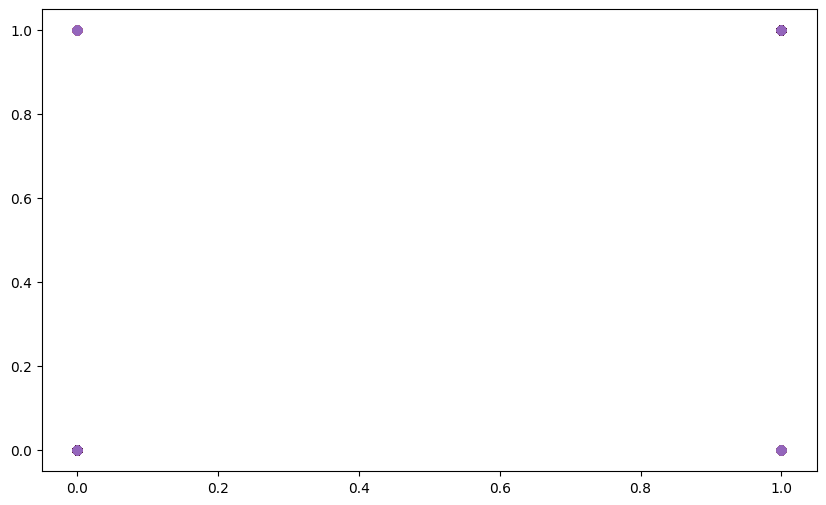

In [30]:
results = []
import matplotlib.pyplot as pltt
import matplotlib.pyplot as PLT
PLT.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))
    #pltt.plot(y_test, y_pred, 'o', label=name)
    PLT.scatter(y_test, y_pred, label=name, alpha=0.5)

###**Train a Deep Learning model with 3 Layers**


In [31]:
from tensorflow.keras.layers import LeakyReLU

59/59 [==============================] - 0s 776us/step


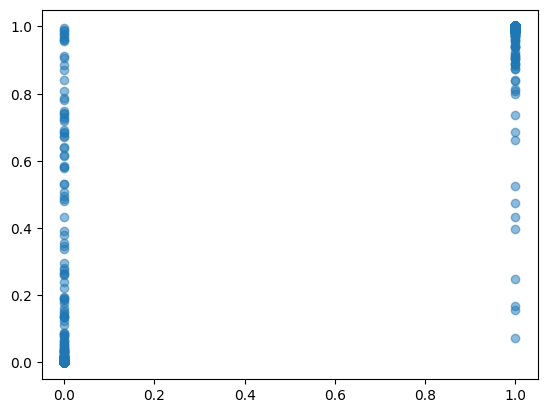

In [32]:
# Deep Learning model with 3 layers

deep_model = Sequential()
deep_model.add(Dense(64, input_dim=6, activation=LeakyReLU(alpha=0.01))) # 64 neurons with 6 input features and Relu as the activation function
deep_model.add(Dense(32, activation=LeakyReLU(alpha=0.01)))  # Additional hidden layer with 32 neurons
deep_model.add(Dense(1, activation='sigmoid')) #output layer with sigmoid activation function for binary classification
deep_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
deep_model.fit(X_train_scaled, y_train, epochs=45, batch_size=8, verbose=0)
_, deep_accuracy = deep_model.evaluate(X_test_scaled, y_test)
y_deep_pred=deep_model.predict(X_test_scaled)
PLT.scatter(y_test, y_deep_pred, label="Deep Learning", alpha=0.5)
#pltt.plot(y_test, y_deep_pred, 'o', label='Deep Learning')

###**Print results and find the best model**

In [33]:
best_model = max(results, key=lambda x: x[1])

print("Machine Learning Model Accuracies:")
print("{:<30} {:<10}".format("Model", "Accuracy"))
#To ensure proper alignment of tab spaces when printing in a tabular format
#using string formatting with fixed widths for the columns.
print("------------------------------------------")
for name, accuracy in results:
    print("{:<30} {:<10.3f}".format(name, accuracy))

print("\nDeep Learning Model Accuracy:")
print("------------------------------------------")
print("{:<30} {:<10.3f}".format("Deep Learning", deep_accuracy))

print(f"\nBest Machine Learning Model based on Accuracy: {best_model[0]} with Accuracy {best_model[1]*100:.10f}%")
if(deep_accuracy>best_model[1]):
  print(f"\nOverall Best Model based on Accuracy: Deep Learning with Accuracy {deep_accuracy*100:.10f}%")

Machine Learning Model Accuracies:
Model                          Accuracy  
------------------------------------------
Logistic Regression            0.961     
Decision Tree                  0.998     
Random Forest                  0.998     
Naive Bayes                    0.940     
Support Vector Machine         0.971     

Deep Learning Model Accuracy:
------------------------------------------
Deep Learning                  0.976     

Best Machine Learning Model based on Accuracy: Decision Tree with Accuracy 99.8400000000%


###**Accuracy Plot**

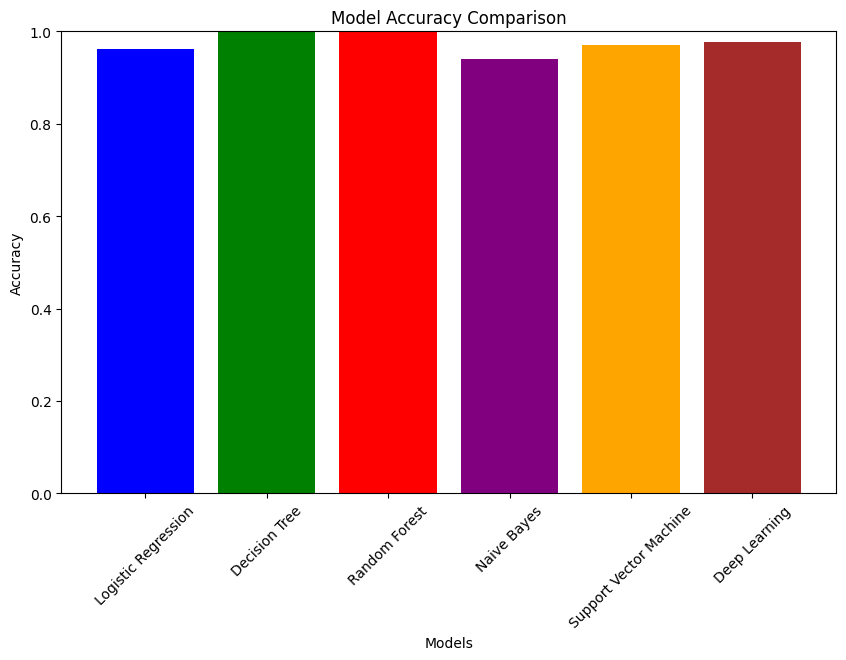

In [34]:
import matplotlib.pyplot as plt

model_names = [name for name, _ in results] + ['Deep Learning']
accuracies = [accuracy for _, accuracy in results] + [deep_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.show()

In [35]:
import plotly.express as px
data_oh = px.data.gapminder()
#results.remove(("Deep Learning", deep_accuracy))
#XR=[]
#YR=[]
#for i in results:
#  XR.append(i[0])
#  YR.append(i[1])
fig = px.bar(data_oh, x=model_names, y=accuracies, height=400)
fig.update_layout(title='Model Accuracies', xaxis_title='Model', yaxis_title='Accuracy')
fig.show()

59/59 [==============================] - 0s 783us/step


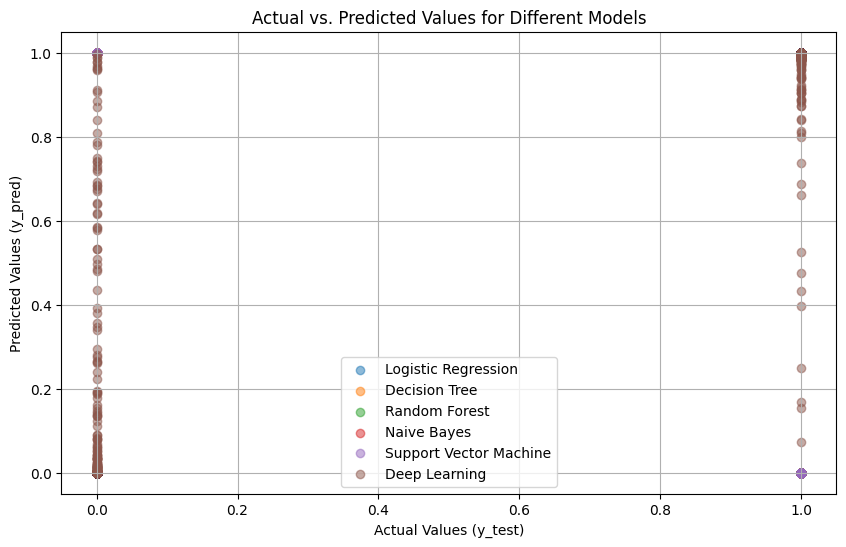

In [36]:
import matplotlib.pyplot as plt_1
plt_1.figure(figsize=(10, 6))
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    plt_1.scatter(y_test, y_pred, label=name, alpha=0.5)

y_pred_deep = deep_model.predict(X_test_scaled)
plt_1.scatter(y_test, y_pred_deep, label="Deep Learning", alpha=0.5)

plt_1.xlabel("Actual Values (y_test)")
plt_1.ylabel("Predicted Values (y_pred)")
plt_1.legend()
plt_1.title("Actual vs. Predicted Values for Different Models")
plt_1.grid(True)
plt_1.show()

####**To input user values and predict whether it's overheated or not using the best model**

In [47]:
user_temperature = float(input("Enter temperature: "))
user_fan_speed = float(input("Enter fan speed: "))
Cpu_load = float(input("Enter CPU Load: "))
Gpu_load = float(input("Enter GPU Load: "))
Ram_Usage = float(input("Enter Ram Usage: "))
Vram_USage  = float(input("Enter Vram Usage: "))

user_data = [[user_temperature, user_fan_speed,Cpu_load,Gpu_load,Ram_Usage,Vram_USage]]
#print(best_model,type(best_model))
#best_model = models[best_model]  # Get the best model
#print(type(best_model))
user_data_scaled = scaler.transform(user_data)  # Standardize user input
print()
# Predict
prediction = best_model.predict(user_data_scaled)
print(prediction)

if prediction[0] == 1:
    print("The CPU is overheated.")
else:
    print("The CPU is not overheated.")

Enter temperature: 60
Enter fan speed: 3005
Enter CPU Load: 0.56
Enter GPU Load: 0.44
Enter Ram Usage: 0.53
Enter Vram Usage: 0.38

[False]
The CPU is not overheated.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



####**To get Real-Time values from the PC easily**

In [45]:
!pip install psutil
!pip install nvidia-ml-py

In [ ]:
import os
import psutil  # For CPU and RAM information
import platform

# Check the operating system
if platform.system() == "Windows":
    import wmi  # For CPU temperature on Windows
else:
    import subprocess  # For CPU temperature on Linux

try:
    # Function to get CPU temperature (platform-independent)
    def get_cpu_temperature():
        if platform.system() == "Windows":
            w = wmi.WMI(namespace="root/OpenHardwareMonitor")
            temperature_info = w.Sensor()
            for sensor in temperature_info:
                if "CPU Core" in sensor.Name:
                    return float(sensor.Value)
        else:  # Linux
            result = subprocess.check_output(["sensors"])
            temperature = None
            for line in result.decode().split("\n"):
                if "Package id 0" in line:
                    temperature = float(line.split("+")[1].split("°")[0])
            return temperature

    # Function to get fan speed, GPU load, and VRAM usage
    def get_gpu_info():
        import nvidia_smi

        nvidia_smi.nvmlInit()
        handle = nvidia_smi.nvmlDeviceGetHandleByIndex(0)  # Assuming one GPU is present
        fan_speed = nvidia_smi.nvmlDeviceGetFanSpeed(handle)
        gpu_load = nvidia_smi.nvmlDeviceGetUtilizationRates(handle).gpu
        vram_info = nvidia_smi.nvmlDeviceGetMemoryInfo(handle)
        vram_usage = (vram_info.used / vram_info.total) * 100

        return fan_speed, gpu_load, vram_usage

    # Function to get CPU load
    def get_cpu_load():
        return psutil.cpu_percent(interval=1)

    # Function to get RAM usage
    def get_ram_usage():
        return psutil.virtual_memory().percent

    # Gather system information
    cpu_temperature = get_cpu_temperature()
    fan_speed, gpu_load, vram_usage = get_gpu_info()
    cpu_load = get_cpu_load()
    ram_usage = get_ram_usage()

    # Print the collected information
    print(f"CPU Temperature: {cpu_temperature}°C")
    print(f"Fan Speed: {fan_speed}")
    print(f"CPU Load: {cpu_load}%")
    print(f"GPU Load: {gpu_load}%")
    print(f"RAM Usage: {ram_usage}%")
    print(f"VRAM Usage: {vram_usage}%")

except Exception as e:
    print(f"Error: {str(e)}")